In [ ]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
TRAIN = pd.read_csv('/Users/thientramvu/Documents/Data/PY20/Big Mart Sales/Modified/train_modified.csv')
TEST = pd.read_csv('/Users/thientramvu/Documents/Data/PY20/Big Mart Sales/Modified/test_modified.csv')

In [ ]:
TRAIN.shape, TEST.shape

((8523, 36), (5681, 35))

In [ ]:
TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Item_Outlet_Sales          8523 non-null   float64
 6   Item_Visibility_MeanRatio  8523 non-null   float64
 7   Outlet_Years               8523 non-null   int64  
 8   Item_Fat_Content_0         8523 non-null   int64  
 9   Item_Fat_Content_1         8523 non-null   int64  
 10  Item_Fat_Content_2         8523 non-null   int64  
 11  Outlet_Location_Type_0     8523 non-null   int64  
 12  Outlet_Location_Type_1     8523 non-null   int64  
 13  Outlet_Location_Type_2     8523 non-null   int64

In [ ]:
TEST.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             int64
Item_Fat_Content_1             int64
Item_Fat_Content_2             int64
Outlet_Location_Type_0         int64
Outlet_Location_Type_1         int64
Outlet_Location_Type_2         int64
Outlet_Size_0                  int64
Outlet_Size_1                  int64
Outlet_Size_2                  int64
Outlet_Type_0                  int64
Outlet_Type_1                  int64
Outlet_Type_2                  int64
Outlet_Type_3                  int64
Item_Group_0                   int64
Item_Group_1                   int64
Item_Group_2                   int64
Item_Group_3                   int64
Item_Group_4                   int64
Outlet_Label_0                 int64
Outlet_Label_1                 int64
O

In [ ]:
train = TRAIN.drop(columns=['Item_Identifier','Outlet_Identifier', 'Item_Weight', 'Item_Visibility', 'Outlet_Years'])

In [ ]:
test = TEST.drop(columns=['Item_Identifier','Outlet_Identifier', 'Item_Weight', 'Item_Visibility', 'Outlet_Years'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_MRP                   8523 non-null   float64
 1   Item_Outlet_Sales          8523 non-null   float64
 2   Item_Visibility_MeanRatio  8523 non-null   float64
 3   Item_Fat_Content_0         8523 non-null   int64  
 4   Item_Fat_Content_1         8523 non-null   int64  
 5   Item_Fat_Content_2         8523 non-null   int64  
 6   Outlet_Location_Type_0     8523 non-null   int64  
 7   Outlet_Location_Type_1     8523 non-null   int64  
 8   Outlet_Location_Type_2     8523 non-null   int64  
 9   Outlet_Size_0              8523 non-null   int64  
 10  Outlet_Size_1              8523 non-null   int64  
 11  Outlet_Size_2              8523 non-null   int64  
 12  Outlet_Type_0              8523 non-null   int64  
 13  Outlet_Type_1              8523 non-null   int64

In [ ]:
# split data into train set and validation set
# array = train.values
Y = train['Item_Outlet_Sales'].values
X = train.drop(columns='Item_Outlet_Sales').values
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

X_train.shape, X_validation.shape

((6818, 30), (1705, 30))

In [ ]:
Y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [ ]:
# k-fold
num_folds = 10
seed = 49

# evaluate models by negative mean_squared_error
scoring = 'neg_mean_squared_error'

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -1311090.508817 (73182.498372)
LASSO: -1310723.686354 (72481.078750)
EN: -1580392.347126 (56503.362555)
KNN: -1438483.752240 (98321.800215)
CART: -2584746.760023 (189075.874484)
SVR: -2461250.478720 (140075.953749)


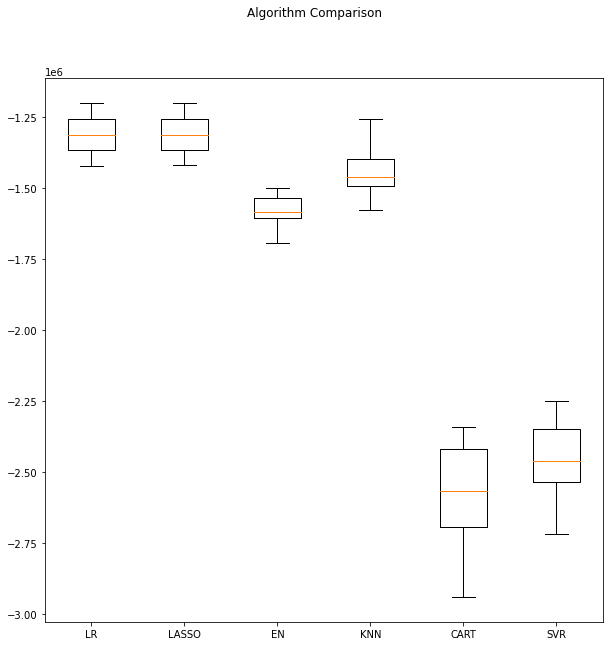

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
pyplot.boxplot(results)
ax.set_xticklabels(names)

plt.savefig('BigMart_Reg.png', dpi=300,bbox_inches='tight')
pyplot.show()

In [ ]:
# Normalize data to enhance model performance
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -1311230.808614 (73098.453718)
ScaledLASSO: -1310943.288404 (72950.701072)
ScaledEN: -1437698.607909 (74925.136504)
ScaledKNN: -1446966.724498 (94824.241083)
ScaledCART: -2538342.604611 (151602.279305)
ScaledSVR: -2902223.966603 (182430.770966)


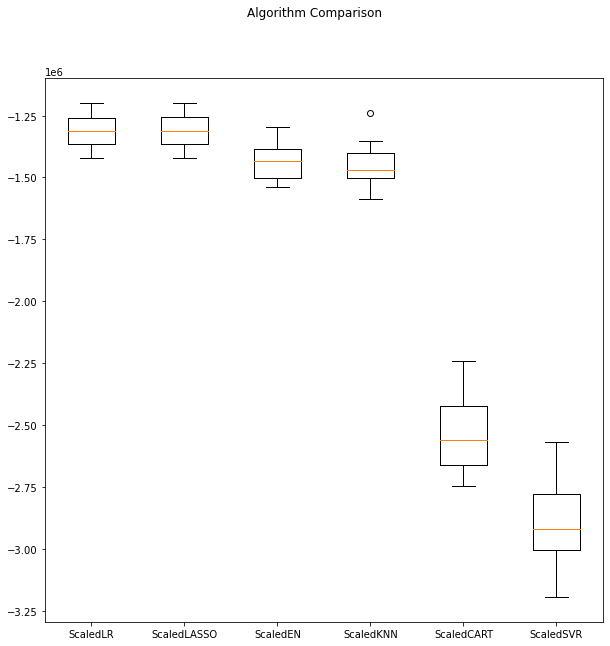

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
pyplot.boxplot(results)
ax.set_xticklabels(names)

plt.savefig('BigMart_ScaledReg.png', dpi=300,bbox_inches='tight')
pyplot.show()

## Ensemble models

In [ ]:
# ensembles
ensembles = []

# boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

# bagging
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -1475358.364330 (91486.543027)
ScaledGBM: -1197095.864084 (85911.424902)
ScaledRF: -1387016.569604 (80737.563847)
ScaledET: -1628363.281891 (95184.431642)


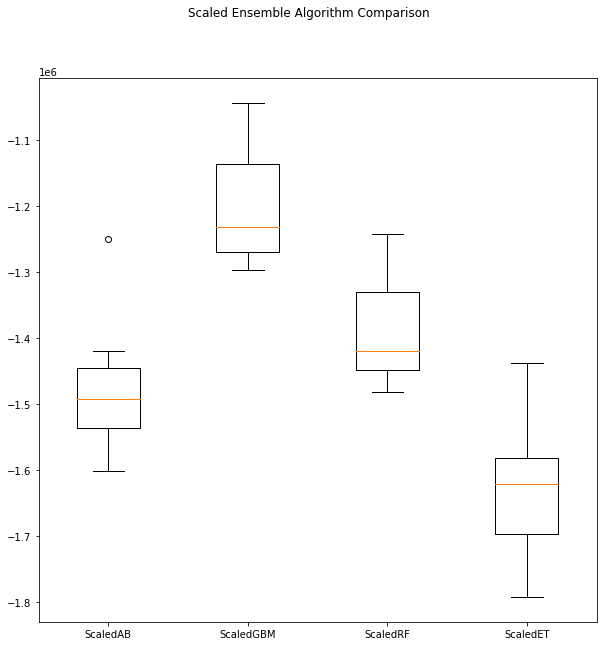

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

plt.savefig('BigMart_ScalesEns.png', dpi=300,bbox_inches='tight')
pyplot.show()

In [ ]:
# Tuning ScaledGBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

learning_rate = [0.05, 0.1, 0.2]
n_estimators = range(20,101,10)

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
#                   , min_samples_split=min_samples_split, max_depth=max_depth, max_features=max_features)
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1187997.782705 using {'learning_rate': 0.05, 'n_estimators': 100}
-1524979.286421 (74734.309704) with: {'learning_rate': 0.05, 'n_estimators': 20}
-1341106.875578 (63464.989901) with: {'learning_rate': 0.05, 'n_estimators': 30}
-1256847.625035 (63922.006393) with: {'learning_rate': 0.05, 'n_estimators': 40}
-1215858.800825 (67301.717375) with: {'learning_rate': 0.05, 'n_estimators': 50}
-1199098.901031 (71357.253169) with: {'learning_rate': 0.05, 'n_estimators': 60}
-1192551.686998 (74101.151511) with: {'learning_rate': 0.05, 'n_estimators': 70}
-1189572.078236 (76098.212167) with: {'learning_rate': 0.05, 'n_estimators': 80}
-1188571.260134 (78138.960497) with: {'learning_rate': 0.05, 'n_estimators': 90}
-1187997.782705 (79580.225350) with: {'learning_rate': 0.05, 'n_estimators': 100}
-1252286.824403 (63848.683248) with: {'learning_rate': 0.1, 'n_estimators': 20}
-1199064.881636 (71105.227308) with: {'learning_rate': 0.1, 'n_estimators': 30}
-1189618.810487 (76743.953128) with: 

In [ ]:
# Tuning ScaledGBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

learning_rate = [0.01, 0.05]
n_estimators = range(20,201,10)

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
#                   , min_samples_split=min_samples_split, max_depth=max_depth, max_features=max_features)
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1187490.425219 using {'learning_rate': 0.05, 'n_estimators': 110}
-2443790.367439 (128721.292596) with: {'learning_rate': 0.01, 'n_estimators': 20}
-2249781.187028 (118969.439070) with: {'learning_rate': 0.01, 'n_estimators': 30}
-2089061.111695 (110835.726916) with: {'learning_rate': 0.01, 'n_estimators': 40}
-1953751.567119 (103012.574715) with: {'learning_rate': 0.01, 'n_estimators': 50}
-1840762.943304 (96211.661662) with: {'learning_rate': 0.01, 'n_estimators': 60}
-1744285.136592 (89734.540807) with: {'learning_rate': 0.01, 'n_estimators': 70}
-1662484.798648 (83988.504273) with: {'learning_rate': 0.01, 'n_estimators': 80}
-1593271.816956 (79181.622268) with: {'learning_rate': 0.01, 'n_estimators': 90}
-1534623.308687 (75228.982707) with: {'learning_rate': 0.01, 'n_estimators': 100}
-1484912.427540 (72107.958179) with: {'learning_rate': 0.01, 'n_estimators': 110}
-1442079.231285 (69345.769633) with: {'learning_rate': 0.01, 'n_estimators': 120}
-1405867.709678 (67451.705381

In [ ]:
# Tuning ScaledGBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

learning_rate = [0.05]
min_samples_split = [9, 11]
max_depth = [5, 8]
max_features = [6, 9, 11]
n_estimators = [110]

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, min_samples_split=min_samples_split, max_depth=max_depth, max_features=max_features)
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1200314.986857 using {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 9, 'min_samples_split': 9, 'n_estimators': 110}
-1211186.670777 (77110.065682) with: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 6, 'min_samples_split': 9, 'n_estimators': 110}
-1214509.527947 (79611.642691) with: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 6, 'min_samples_split': 11, 'n_estimators': 110}
-1200314.986857 (80768.636637) with: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 9, 'min_samples_split': 9, 'n_estimators': 110}
-1201688.294200 (79575.322880) with: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 9, 'min_samples_split': 11, 'n_estimators': 110}
-1205282.310893 (82712.635874) with: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 11, 'min_samples_split': 9, 'n_estimators': 110}
-1201446.614710 (83874.506469) with: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 11, 'min_samples_split': 11, 'n_estimators': 110}
-1275702.561775 (

In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = GradientBoostingRegressor(random_state=seed,learning_rate=0.05, n_estimators=110)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=110, random_state=49)

In [ ]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

1058553.7265786023


In [ ]:
# sqrt MSE
np.sqrt(mean_squared_error(Y_validation, predictions))

1028.860401890656

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(Y_validation, predictions))

0.5787054552160553
